## import modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import matplotlib.pyplot as plt

## Data gathering

In [2]:
df=pd.read_csv('medical_insurance (2).csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### sex columns

In [4]:
df['sex'].replace({'male':1,'female':0},inplace=True)   #label encoding

### smoker columns

In [5]:
df['smoker'].replace({'no':0,'yes':1},inplace=True)    # label encoding

### region columns

In [6]:
df=pd.get_dummies(df,columns=['region'])              # 1 vs other

### charges columns

<AxesSubplot: >

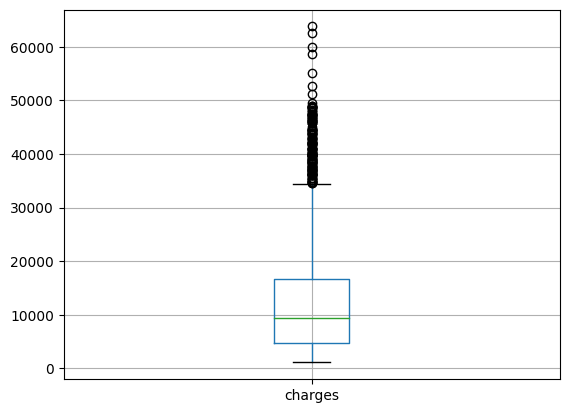

In [7]:
df[['charges']].boxplot()

In [8]:
q1=df['charges'].describe()[4]
q3=df['charges'].describe()[6]
iqr=q3-q1

In [9]:
uf=q3+1.5*(iqr)
uf                              

34489.350562499996

In [10]:
maX=df[df['charges']<uf].max()

In [11]:
more=maX[5]
more                           

34472.841

In [12]:
df1=df.copy()                    # copy of df

In [13]:
df.loc[df['charges']>uf, 'charges']=more   # replacing outliers with max value

In [14]:
df[['charges']].boxplot()

<AxesSubplot: >

In [15]:
df.head(15)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


In [16]:
np.where(df['charges']==more)

(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
          82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
         203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
         281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
         373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
         530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
         629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
         736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
         850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
         956,  958, 1001, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049,
        1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139,
        1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249,
        1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323], dtype=int64),)

In [17]:
q1=df['bmi'].describe()[4]
q3=df['bmi'].describe()[6]
iqr1=q3-q1

In [18]:
uf=q3+1.5*(iqr1)
uf

47.290000000000006

In [19]:
df.loc[df['bmi']>uf,'bmi']=35          # replacing outlier with static value

In [20]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


### train test split

In [21]:
x=df.drop('charges',axis=1)
y=df['charges']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

### fit linear regression model

In [23]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### evalution on testing data

In [24]:

y_predict=model.predict(x_test)
mse=mean_squared_error(y_test,y_predict)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_test,y_predict)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_test,y_predict)
print('mae',mae)

mse 23607121.532503687
******************************************************************************
rmse 4858.716037442782
******************************************************************************
r2 0.7823815392356217
******************************************************************************
mae 3345.4482903761623


### evalution on training data

In [25]:

y_pred=model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_train,y_pred)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_train,y_pred)
print('mae',mae)

mse 26579384.106873985
******************************************************************************
rmse 5155.519770777141
******************************************************************************
r2 0.7384723747829558
******************************************************************************
mae 3397.261654617361


In [26]:
df.head(1)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.924,0,0,0,1


### Testing on single row

In [27]:
age=23
sex='male'
bmi=30
children=3
smoker='yes'
region_northeast="northeast"

In [28]:
data={'sex':{'male':1,'female':0},
            'smoker':{'no':0,'yes':1},
            'columns':list(x.columns)
          }

In [29]:
data['sex'].get(sex)

1

In [30]:
region='region_'+'northeast'

In [31]:
region_index=np.where(x.columns==region)[0][0]

In [32]:
data['smoker'].get(smoker)

1

In [33]:
array=np.zeros(x.shape[1])

In [34]:
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
array[0]=age
array[1]=data['sex'].get(sex)
array[2]=bmi
array[3]=children
array[4]=data['smoker'].get(smoker)
array[region_index]=1
array

array([23.,  1., 30.,  3.,  1.,  1.,  0.,  0.,  0.])

In [36]:
predict=model.predict([array])
predict

C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25612.75611459])

In [37]:
import json ,pickle

In [38]:
with open ('Medical.pkl','wb')as f:
    pickle.dump(model,f)

In [39]:
with open('data.json','w') as m:
    json.dump(data,m)

In [40]:
# we will adopt linear reg model because lasso and ridge not gives satiesfactory result

### ridge regression

In [41]:

rid=Ridge()
rid.fit(x_train,y_train)

Ridge()

In [42]:
Y_pred=rid.predict(x_test)

In [43]:
# test data evalution
mse=mean_squared_error(y_test,Y_pred)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_test,Y_pred)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_test,Y_pred)
print('mae',mae)

mse 23641991.59779494
******************************************************************************
rmse 4862.303116609961
******************************************************************************
r2 0.7820600951355866
******************************************************************************
mae 3357.074000780076


In [44]:
Y_predict=rid.predict(x_train)
mse=mean_squared_error(y_train,Y_predict)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_train,Y_predict)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_train,Y_predict)
print('mae',mae)

mse 26581487.336652942
******************************************************************************
rmse 5155.723745183885
******************************************************************************
r2 0.7384516800713264
******************************************************************************
mae 3407.007341264966


### lasso 

In [45]:
# lasso reg
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [46]:
pred=lasso.predict(x_test)

In [47]:
mse=mean_squared_error(y_test,pred)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_test,pred)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_test,pred)
print('mae',mae)

mse 23614922.943330638
******************************************************************************
rmse 4859.518797507695
******************************************************************************
r2 0.7823096231820862
******************************************************************************
mae 3346.3201689414504


In [48]:
predict=lasso.predict(x_train)

In [49]:
mse=mean_squared_error(y_train,predict)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_train,predict)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_train,predict)
print('mae',mae)

mse 26579413.36443502
******************************************************************************
rmse 5155.522608275035
******************************************************************************
r2 0.7384720869034314
******************************************************************************
mae 3397.7082127175563


In [50]:
Lass=Lasso(alpha=2.9899)
Lass.fit(x_train,y_train)

Lasso(alpha=2.9899)

In [51]:
Pr=Lass.predict(x_test)

In [52]:
# testing data evalution with hypertunning
mse=mean_squared_error(y_test,Pr)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_test,Pr)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_test,Pr)
print('mae',mae)

mse 23630613.68130514
******************************************************************************
rmse 4861.1329627263995
******************************************************************************
r2 0.7821649806325247
******************************************************************************
mae 3348.0551191274863


In [53]:
pr=Lass.predict(x_train)

In [54]:
mse=mean_squared_error(y_train,pr)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_train,pr)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_train,pr)
print('mae',mae)

mse 26579645.612404604
******************************************************************************
rmse 5155.54513241855
******************************************************************************
r2 0.738469801701498
******************************************************************************
mae 3398.6278349802574


In [55]:
# ridge with hypurtunning

R=Ridge(alpha=1.11)
R.fit(x_train,y_train)

Ridge(alpha=1.11)

In [56]:
PRED=R.predict(x_test)

In [57]:
mse=mean_squared_error(y_test,PRED)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_test,PRED)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_test,PRED)
print('mae',mae)

mse 23646052.93466775
******************************************************************************
rmse 4862.720733773198
******************************************************************************
r2 0.7820226563534932
******************************************************************************
mae 3358.3445524877907


In [58]:
PR=R.predict(x_train)

In [59]:
mse=mean_squared_error(y_train,PR)
print('mse',mse)
print('*'*78)
rmse=np.sqrt(mse)
print('rmse',rmse)
print('*'*78)
r2=r2_score(y_train,PR)
print('r2',r2)
print('*'*78)
mae=mean_absolute_error(y_train,PR)
print('mae',mae)

mse 26581972.19985497
******************************************************************************
rmse 5155.770766806353
******************************************************************************
r2 0.7384469092639492
******************************************************************************
mae 3408.0940476315895
